# AM783: Applied Markov processes | Histograms in Python

Hugo Touchette

Last updated: 26 August 2022

Python 3

Reference:
- https://www.datacamp.com/community/tutorials/histograms-matplotlib
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Magic command for vectorised figures
%config InlineBackend.figure_format = 'svg'

In [12]:
data = np.array([np.random.randn() for i in range(10**5)])

## Simple way: hist function

The function hist is part of the Matplotlib library. By default, hist gives the histogram values in addition to the plot.

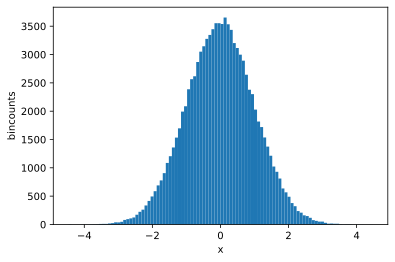

In [13]:
plt.hist(data,100)
plt.xlabel('x')
plt.ylabel('bincounts')
plt.show()

To only get the plot, use the show command. Also use the 'density' option to make sure the histogram is normalised as a probability density.

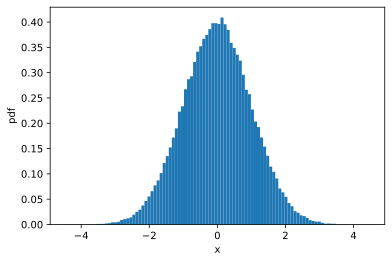

In [16]:
plt.hist(data, 100, density=True)
plt.xlabel('x')
plt.ylabel('pdf')
plt.show()

## Better way: histogram function

Numpy has a histogram command which is quite comprehensive:

In [17]:
np.histogram(data, 10)

(array([   16,   368,  3409, 15031, 31422, 31392, 14754,  3263,   332,
           13]),
 array([-4.46422781e+00, -3.57082236e+00, -2.67741692e+00, -1.78401148e+00,
        -8.90606038e-01,  2.79940418e-03,  8.96204846e-01,  1.78961029e+00,
         2.68301573e+00,  3.57642117e+00,  4.46982661e+00]))

The first array is the bin counts, not normalised. The second array contains the $n+1$ points that specify the bases of the $n$ bins we want, so that array has one more point than the bin count array. With this in mind, here's how we can plot the result as a bar chart:

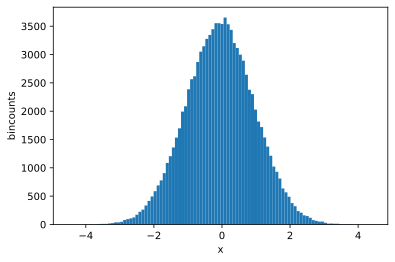

In [18]:
nbins = 100
hist, bin_spec = np.histogram(data, nbins)
a, b = min(bin_spec), max(bin_spec)
dx = (b-a)/nbins
plt.bar(bin_spec[:-1], hist, width = dx)
plt.xlabel('x')
plt.ylabel('bincounts')
plt.show()

The directive bin_spec[:-1] takes all elements except the last, so we are positioning the bins with the left coordinates. To position the bins with center points, push the position by $dx/2$:

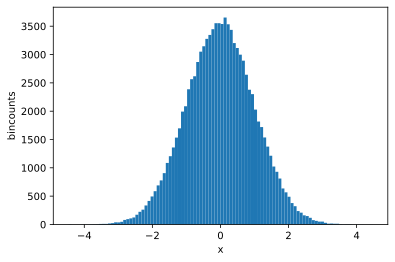

In [19]:
nbins = 100
hist, bin_spec = np.histogram(data, nbins)
a, b = min(bin_spec), max(bin_spec)
dx = (b-a)/nbins
plt.bar(bin_spec[:-1]+dx/2.0, hist, width = dx)
plt.xlabel('x')
plt.ylabel('bincounts')
plt.show()

As it is, the histogram is not normalised as a probability density. To force that normalisation, use again the 'density' option:

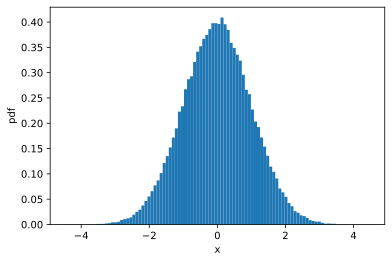

In [20]:
nbins = 100
hist, bin_spec = np.histogram(data, nbins, density=True)
a, b = min(bin_spec), max(bin_spec)
dx = (b-a)/nbins
plt.bar(bin_spec[:-1]+dx/2.0, hist, width = dx)
plt.xlabel('x')
plt.ylabel('pdf')
plt.show()

## Plotting discrete distributions with the correct normalisation

The hist function from plt normalises histograms as density histrograms with density=True. When dealing with discrete random variables, and their discrete distributions, the bin size must be properly set in order to get the correct normalisation. Here's an example involving Bernoulli random variables:

In [10]:
def bern(p):
    if np.random.random()<p:
        return 1
    else:
        return 0

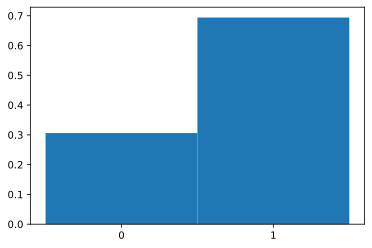

In [11]:
sample = [bern(0.7) for i in range(1000)]
plt.hist(sample, density=True, bins=[0,1,2], align='left')
plt.xticks([0,1])
plt.show()

Alternatively, we can use the histogram function:

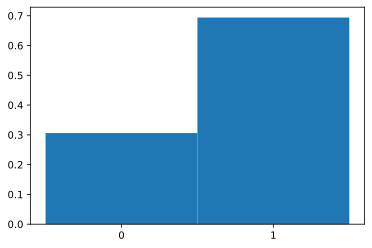

In [17]:
hist, bin_spec = np.histogram(sample, bins=[0, 1, 2], density=True)
plt.bar(bin_spec[:-1], hist, width = 1)
plt.xticks([0, 1])
plt.show()